In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_log_error

X = pd.read_csv("new_train_1h.csv")
test_df = pd.read_csv("new_test_1h.csv")
# X_train = train_df.drop(['SalePrice'], axis=1)
# y_train = train_df['SalePrice']
# train_df

In [2]:
# X = pd.DataFrame( {'features': cols,
#      'Random Forest feature importances': rf_features,
#      'Extra Trees  feature importances': et_features,
#       'AdaBoost feature importances': ada_features,
#     'Gradient Boost feature importances': gb_features
#     })

In [3]:
train_df = X.sample(frac=0.6,random_state=200)
evaluate_df = X.drop(train_df.index)

X_train = train_df.drop(['Id','SalePrice'], axis=1)
Y_train = train_df["SalePrice"]
X_train_full = X.drop(['Id','SalePrice'], axis=1)
Y_train_full = X["SalePrice"]
X_eval  = evaluate_df.drop(['Id','SalePrice'], axis=1)
Y_eval  = evaluate_df["SalePrice"]
X_test = test_df.drop('Id', axis=1)

In [4]:
# # Check if any columns have null values
# for (columnName, columnData) in X_test.iteritems():
#     print (f'{columnName}: {X_test[columnName].isna().sum()}')

In [5]:
pd.set_option('display.max_columns', None)
X_test.describe()

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,NeighborhoodLotArea,NeighborhoodBldgType,TotalSquareFeet,NeighborhoodHouseStyle,OverallQualNCond,NeighborhoodOverallQualNCond,AdjRemodAdd,MonthMean,QuarterMean,QuarterMeanNorm,MonthMeanNorm,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,Neighborhood_25,LotConfig_2,LotConfig_3,LotConfig_4,LotConfig_5,BldgType_2,BldgType_3,BldgType_4,BldgType_5,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,HouseStyle_8,SaleCondition_1,SaleCondition_2,SaleCondition_3,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageType_1,GarageType_2,GarageType_3,GarageType_4,Foundation_1,Foundation_2,Foundation_3,Foundation_4
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,0.004286,-0.044244,12.692255,0.564313,0.569225,0.062296,0.599383,0.521933,0.624058,0.483208,0.404387,0.590137,-0.005200,0.219438,0.017839,-0.015162,-0.013639,0.789582,0.930775,-0.007766,-0.024530,-0.024805,-0.029076,0.008119,0.008119,0.005310,-0.005193,-0.007556,-0.009517,0.627485,-0.042265,-0.024612,0.302776,-0.001454,-0.001242,0.461275,0.465559,0.902673,-0.004229,0.012240,0.040823,0.469121,-0.020580,0.427789,0.366374,0.293147,0.561046,181553.474284,181041.036491,0.014985,0.021669,0.038382,0.009596,0.034270,0.064428,0.086361,0.052776,0.005483,0.015764,0.009596,0.149417,0.044551,0.045236,0.039753,0.058944,0.007539,0.080192,0.035641,0.010966,0.065798,0.008910,0.023304,0.017820,0.061001,0.020562,0.026045,0.169979,0.006854,0.056203,0.039068,0.036326,0.077450,0.825908,0.031528,0.109664,0.008910,0.043180,0.510624,0.292666,0.0,0.061001,0.825223,0.082248,0.428376,0.266621,0.251542,0.268677,0.027416,0.584647,0.067169,0.113091,0.411926,0.004798,0.453050
std,0.963694,0.628315,6.509928,0.159646,0.139217,0.110626,0.146611,0.098159,0.207945,0.113670,0.268246,0.352156,0.999234,0.168007,1.044447,0.994905,1.005605,0.239171,0.253924,1.014792,0.981126,0.949273,0.959520,1.011151,1.011151,1.004016,1.000288,1.008624,0.972068,0.165195,0.961460,1.001998,0.333653,1.019497,1.008311,0.126108,0.124452,0.287102,1.009629,1.019354,0.015086,0.267057,0.987426,0.

In [6]:
# # Output the results of a test
# predictions = sgd.predict(X_test)
# output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': predictions})
# output.to_csv('my_submission.csv', index=False)

## Drop Columns (list from House Prices - Column Selection)

In [7]:
#orig_drop_list = ['Neighborhood', 'QuarterMean', 'MonthMean']
# orig_drop_list = ['Neighborhood', 'QuarterMean', 'MonthMean', 'QuarterMeanNorm', 'MonthMeanNorm']

# X_train.drop(orig_drop_list, axis=1, inplace=True)
# X_eval.drop(orig_drop_list, axis=1, inplace=True)
# X_train_full.drop(orig_drop_list, axis=1, inplace=True)
# X_test.drop(orig_drop_list, axis=1, inplace=True)

#drop_list = ['LotConfig_4'] # best yet!
drop_list = ['LotConfig_4', 'Foundation_3', 'Neighborhood_3', 'BldgType_2', 'Neighborhood_21', 'Neighborhood_12', 'Neighborhood_8', 'HouseStyle_8', 'BldgType_3', 'HouseStyle_2', 'Neighborhood_10']

X_train.drop(drop_list, axis=1,inplace=True)
X_eval.drop(drop_list, axis=1,inplace=True)
X_train_full.drop(drop_list, axis=1,inplace=True)
X_test.drop(drop_list, axis=1,inplace=True)


# new_column_list = ['QuarterMeanNorm', 'MonthMeanNorm', 'AdjRemodAdd', \
#                    'OverallQualNCond', 'TotalSquareFeet', 'GarageCars', \
#                    'TotRmsAbvGrd', 'LotArea', 'Neighborhood', \
#                    'FullBath', 'BedroomAbvGr', 'KitchenQual', \
#                    'BsmtQual', 'ExterQual']
# X_train = X_train[new_column_list]
# X_eval = X_eval[new_column_list]
# X_train_full = X_train_full[new_column_list]
# X_test = X_test[new_column_list]

## Linear Regression

In [8]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)

acc_train_lr = np.sqrt(mean_squared_log_error(Y_train, lr.predict(X_train)))
acc_eval_lr = np.sqrt(mean_squared_log_error(Y_eval, lr.predict(X_eval)))

print (f'LR: Train = {acc_train_lr}  Evaluate = {acc_eval_lr}')

LR: Train = 0.13627828836845757  Evaluate = 0.16639242711507643


## Stochastic Gradient Descent (SGD)

In [9]:
from sklearn import linear_model

sgd = linear_model.SGDClassifier(random_state=1, max_iter=5, tol=None)
sgd.fit(X_train, Y_train)

acc_train_sgd = np.sqrt(mean_squared_log_error(Y_train, sgd.predict(X_train)))
acc_eval_sgd = np.sqrt(mean_squared_log_error(Y_eval, sgd.predict(X_eval)))

print (f'SGD: Train = {acc_train_sgd}  Evaluate = {acc_eval_sgd}')

SGD: Train = 0.5419722888378429  Evaluate = 0.566291921008765


## Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

acc_train_rf = np.sqrt(mean_squared_log_error(Y_train, random_forest.predict(X_train)))
acc_eval_rf = np.sqrt(mean_squared_log_error(Y_eval, random_forest.predict(X_eval)))

print (f'RF: Train = {acc_train_rf}  Evaluate = {acc_eval_rf}')

RF: Train = 0.0  Evaluate = 0.19849960942155406


## Polynomial Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=1)
X_train_poly = poly_features.fit_transform(X_train)
X_eval_poly = poly_features.fit_transform(X_eval)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

acc_train_pr = np.sqrt(mean_squared_log_error(Y_train, poly_model.predict(X_train_poly)))
acc_eval_pr = np.sqrt(mean_squared_log_error(Y_eval, abs(poly_model.predict(X_eval_poly))))

print (f'PR: Train = {acc_train_pr}  Evaluate = {acc_eval_pr}')

PR: Train = 0.13627828836835387  Evaluate = 0.16639242711492616


## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

#logreg = LogisticRegression(random_state=1, max_iter=1000)
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, Y_train)

acc_train_lr = np.sqrt(mean_squared_log_error(Y_train, logreg.predict(X_train)))
acc_eval_lr = np.sqrt(mean_squared_log_error(Y_eval, logreg.predict(X_eval)))

print (f'LR: Train = {acc_train_lr}  Evaluate = {acc_eval_lr}')

LR: Train = 0.45504521960912436  Evaluate = 0.47933304949976324


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Gaussian Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

acc_train_gnb = np.sqrt(mean_squared_log_error(Y_train, gaussian.predict(X_train)))
acc_eval_gnb = np.sqrt(mean_squared_log_error(Y_eval, gaussian.predict(X_eval)))

print (f'GNB: Train = {acc_train_gnb}  Evaluate = {acc_eval_gnb}')

GNB: Train = 0.0917037787798169  Evaluate = 0.23476093398534525


## Perceptron

In [14]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state=1, max_iter=50)
perceptron.fit(X_train, Y_train)

acc_train_prc = np.sqrt(mean_squared_log_error(Y_train, perceptron.predict(X_train)))
acc_eval_prc = np.sqrt(mean_squared_log_error(Y_eval, perceptron.predict(X_eval)))

print (f'Perceptron: Train = {acc_train_prc}  Evaluate = {acc_eval_prc}')

Perceptron: Train = 0.6069879251118353  Evaluate = 0.6035742073540533


## Linear Support Vector Machine

In [15]:
from sklearn.svm import SVC, LinearSVC

#linear_svc = LinearSVC(random_state=1, max_iter=100000)
linear_svc = LinearSVC(random_state=1)
linear_svc.fit(X_train, Y_train)

acc_train_svm = np.sqrt(mean_squared_log_error(Y_train, linear_svc.predict(X_train)))
acc_eval_svm = np.sqrt(mean_squared_log_error(Y_eval, linear_svc.predict(X_eval)))

print (f'SVM: Train = {acc_train_svm}  Evaluate = {acc_eval_svm}')

SVM: Train = 0.5588372234098508  Evaluate = 0.5975104263870505


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, Y_train)

acc_train_dt = np.sqrt(mean_squared_log_error(Y_train, decision_tree.predict(X_train)))
acc_eval_dt = np.sqrt(mean_squared_log_error(Y_eval, decision_tree.predict(X_eval)))

print (f'DT: Train = {acc_train_dt}  Evaluate = {acc_eval_dt}')

DT: Train = 0.0  Evaluate = 0.24767152559124198


## Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(random_state=1, n_estimators=100)
random_forest_reg.fit(X_train, Y_train)

acc_train_rfr = np.sqrt(mean_squared_log_error(Y_train, random_forest_reg.predict(X_train)))
acc_eval_rfr = np.sqrt(mean_squared_log_error(Y_eval, random_forest_reg.predict(X_eval)))

print (f'RFR: Train = {acc_train_rfr}  Evaluate = {acc_eval_rfr}')

RFR: Train = 0.05351023149853642  Evaluate = 0.1503953101373056


## Gradient Boost Regressor

In [18]:
## Current Best

from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(random_state=1, n_estimators=500, max_features= 0.3)
grad_boost.fit(X_train, Y_train)

acc_train_gb = np.sqrt(mean_squared_log_error(Y_train, grad_boost.predict(X_train)))
acc_eval_gb = np.sqrt(mean_squared_log_error(Y_eval, grad_boost.predict(X_eval)))

print (f'GB: Train = {acc_train_gb}  Evaluate = {acc_eval_gb}')

GB: Train = 0.03120906966305284  Evaluate = 0.13414301320863964


## AdaBoost

In [19]:
from sklearn.ensemble import AdaBoostRegressor

ada_boost = AdaBoostRegressor(random_state=1, n_estimators=100)
ada_boost.fit(X_train, Y_train)

acc_train_ab = np.sqrt(mean_squared_log_error(Y_train, ada_boost.predict(X_train)))
acc_eval_ab = np.sqrt(mean_squared_log_error(Y_eval, ada_boost.predict(X_eval)))

print (f'AdaBoost: Train = {acc_train_ab}  Evaluate = {acc_eval_ab}')

AdaBoost: Train = 0.14173408729874046  Evaluate = 0.1754322254451222


## Extremely Randomized Trees

In [20]:
from sklearn.ensemble import ExtraTreesRegressor

ex_trees = ExtraTreesRegressor(random_state=1, n_estimators=100)
ex_trees.fit(X_train, Y_train)

acc_train_et = np.sqrt(mean_squared_log_error(Y_train, ex_trees.predict(X_train)))
acc_eval_et = np.sqrt(mean_squared_log_error(Y_eval, ex_trees.predict(X_eval)))

print (f'ET: Train = {acc_train_et}  Evaluate = {acc_eval_et}')

ET: Train = 0.0  Evaluate = 0.13817106320028638


## Ensemble: VotingRegessor

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
import xgboost as xgb

reg1 = GradientBoostingRegressor(random_state=1, n_estimators=100)
reg2 = RandomForestRegressor(random_state=1, n_estimators=100)
reg3 = ExtraTreesRegressor(random_state=1, n_estimators=100)
reg4 = AdaBoostRegressor(random_state=1, n_estimators=100)
reg5 = xgb.XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('et', reg3), ('ad', reg4), ('xg', reg5)])
ereg = ereg.fit(X_train, Y_train)

acc_train_vr = np.sqrt(mean_squared_log_error(Y_train, ereg.predict(X_train)))
acc_eval_vr = np.sqrt(mean_squared_log_error(Y_eval, ereg.predict(X_eval)))

print (f'VR: Train = {acc_train_vr}  Evaluate = {acc_eval_vr}')

VR: Train = 0.05735177993647772  Evaluate = 0.14144359096498996


## Ensemble: Stacked Generalization

In [23]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

est_cnt = 100
seed = 42

# final_layer = StackingRegressor(
#     estimators=[('rf', RandomForestRegressor(random_state=seed, n_estimators=est_cnt)),
#                 ('gbrt', GradientBoostingRegressor(random_state=seed, n_estimators=est_cnt))],
#     final_estimator=RidgeCV()
# )

# multi_layer_regressor = StackingRegressor(
#     estimators=[('ridge', RidgeCV()),
#                 ('lasso', LassoCV(random_state=seed)),
#                 ('svr', SVR(C=1, gamma=1e-6, kernel='rbf')),
#                 ('etr', ExtraTreesRegressor(random_state=seed, n_estimators=est_cnt)),
#                 ('adar', AdaBoostRegressor(random_state=seed, n_estimators=est_cnt))],
#     final_estimator=final_layer
# )

#final_estimator = GradientBoostingRegressor(random_state=seed, n_estimators=est_cnt)
final_estimator = xgb.XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)

final_layer = StackingRegressor(
    estimators=[
                ('abar', AdaBoostRegressor(random_state=seed, n_estimators=est_cnt))
                #,('extr', ExtraTreesRegressor(random_state=seed, n_estimators=est_cnt))
                ,('adar', AdaBoostRegressor(random_state=seed, n_estimators=est_cnt))
                ,('gbrt', GradientBoostingRegressor(random_state=seed, n_estimators=est_cnt))
                #,('rf', RandomForestRegressor(random_state=seed, n_estimators=est_cnt))
               ],
    final_estimator=final_estimator
)

second_layer = StackingRegressor(
    estimators=[
                ('abar', AdaBoostRegressor(random_state=seed, n_estimators=est_cnt))
                ,('extr', ExtraTreesRegressor(random_state=seed, n_estimators=est_cnt))
                ,('adar', AdaBoostRegressor(random_state=seed, n_estimators=est_cnt))
                ,('gbrt', GradientBoostingRegressor(random_state=seed, n_estimators=est_cnt))
                ,('rf', RandomForestRegressor(random_state=seed, n_estimators=est_cnt))
               ],
    final_estimator=final_layer
)

multi_layer_regressor = StackingRegressor(
    estimators=[
                #('ridge', RidgeCV())
                ('lasso', LassoCV(random_state=seed))
                ,('svr', SVR(C=1, gamma=1e-6, kernel='rbf'))
                ,('etr', ExtraTreesRegressor(random_state=seed, n_estimators=est_cnt))
               ],
    final_estimator=second_layer
)

multi_layer_regressor.fit(X_train, Y_train)

acc_train_sg = np.sqrt(mean_squared_log_error(Y_train, multi_layer_regressor.predict(X_train)))
acc_eval_sg = np.sqrt(mean_squared_log_error(Y_eval, multi_layer_regressor.predict(X_eval)))

print (f'SG: Train = {acc_train_sg}  Evaluate = {acc_eval_sg}')

SG: Train = 0.08862247504256768  Evaluate = 0.16041095431480187


## XGBoost

In [24]:
import xgboost as xgb


#best = 0.12425 (squarederror)
gbm = xgb.XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=2,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=0, n_estimators=1900, 
             n_jobs=1, nthread=None, objective='reg:squarederror',
             reg_alpha=0.6, reg_lambda=0.3, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1).fit(X_train, Y_train)
acc_train_xg = np.sqrt(mean_squared_log_error(Y_train, gbm.predict(X_train)))
acc_eval_xg = np.sqrt(mean_squared_log_error(Y_eval, gbm.predict(X_eval)))


# best = 0.12434
# gbm = xgb.XGBRegressor( booster='dart', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.2, gamma=2,
#              importance_type='gain', learning_rate=0.01, max_delta_step=0,
#              max_depth=5, min_child_weight=0, n_estimators=1900, 
#              n_jobs=1, nthread=None, objective='reg:squarederror',
#              reg_alpha=0.6, reg_lambda=0.3, scale_pos_weight=1, 
#              silent=None, subsample=0.8, verbosity=1, tree_method='approx',
#              sketch_eps=0.06, skip_drop=0.01).fit(X_train, Y_train)
# acc_train_xg = np.sqrt(mean_squared_log_error(Y_train, gbm.predict(X_train, ntree_limit=1350)))
# acc_eval_xg = np.sqrt(mean_squared_log_error(Y_eval, gbm.predict(X_eval, ntree_limit=1350)))

print (f'XG: Train = {acc_train_xg}  Evaluate = {acc_eval_xg}')
#predictions = gbm.predict(x_new_test)

XG: Train = 0.01703505871750492  Evaluate = 0.13267667713833947


In [25]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

est_cnt = 100
seed = 42

final_layer = StackingRegressor(
    estimators=[
#                 ('xgb', xgb.XGBRegressor( booster='gbtree', colsample_bylevel=1,
#                  colsample_bynode=1, colsample_bytree=0.6, gamma=0,
#                  importance_type='gain', learning_rate=0.01, max_delta_step=0,
#                  max_depth=5, min_child_weight=1.5, n_estimators=1900, 
#                  n_jobs=1, nthread=None, objective='reg:squarederror',
#                  reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
#                  silent=None, subsample=0.8, verbosity=1))
#                 ('rf', RandomForestRegressor(random_state=seed, n_estimators=est_cnt))
                 ('gbrt', GradientBoostingRegressor(random_state=seed, n_estimators=est_cnt))
                ],
    final_estimator=xgb.XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1.5, n_estimators=1900, 
             n_jobs=1, nthread=None, objective='reg:squarederror',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)
)

multi_layer_regressor = StackingRegressor(
    estimators=[('gbrt', GradientBoostingRegressor(random_state=seed, n_estimators=est_cnt))],
    final_estimator=final_layer
)

multi_layer_regressor.fit(X_train, Y_train)

acc_train_sg = np.sqrt(mean_squared_log_error(Y_train, multi_layer_regressor.predict(X_train)))
acc_eval_sg = np.sqrt(mean_squared_log_error(Y_eval, multi_layer_regressor.predict(X_eval)))

print (f'SG: Train = {acc_train_sg}  Evaluate = {acc_eval_sg}')

SG: Train = 0.13617900480498454  Evaluate = 0.18839869817804655


# Current Best

In [26]:
X_test.head()

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,NeighborhoodLotArea,NeighborhoodBldgType,TotalSquareFeet,NeighborhoodHouseStyle,OverallQualNCond,NeighborhoodOverallQualNCond,AdjRemodAdd,MonthMean,QuarterMean,QuarterMeanNorm,MonthMeanNorm,Neighborhood_2,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_9,Neighborhood_11,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_22,Neighborhood_23,Neighborhood_24,Neighborhood_25,LotConfig_2,LotConfig_3,LotConfig_5,BldgType_4,BldgType_5,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,SaleCondition_1,SaleCondition_2,SaleCondition_3,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageType_1,GarageType_2,GarageType_3,GarageType_4,Foundation_1,Foundation_2,Foundation_4
0,0.664045,0.184340,11,0.444444,0.625,0.0000,0.50,0.5,0.50,0.5,0.25,0.50,0.058665,0.33,0.558194,-0.661024,-0.384061,0.50,1,-0.671782,-0.784891,-0.10118,-1.195057,-0.818789,-0.818789,-1.027187,-0.756191,-1.045622,-0.207663,0.50,-0.924904,-0.924153,0.00,-1.005012,1.193712,0.5,0.5,1.0,0.365853,-0.702722,0.043732,0.430894,-0.470432,0.369942,0.325843,0.213950,0.183333,181639.583333,160603.944444,-1.969483,0.027569,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0
1,0.693912,0.519702,11,0.555556,0.625,0.0675,0.50,0.5,0.50,0.5,0.25,0.83,1.057335,0.17,-0.292975,-0.351645,0.629267,0.50,1,0.431791,-0.784891,-0.10118,-0.339412,-0.818789,-0.818789,-1.027187,1.232388,0.169898,-0.207663,0.75,-0.287709,-0.924153,0.00,-1.005012,-0.745643,0.5,0.5,1.0,2.365433,-0.169985,0.049920,0.430894,0.251515,0.369942,0.393258,0.258216,0.133333,181639.583333,160603.944444,-1.969483,0.027569,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0
2,0.484842,0.464294,15,0.444444,0.500,0.0000,0.50,0.5,0.75,0.5,0.25,1.00,0.767611,0.17,-0.292975,-0.963578,-0.279781,0.75,1,-0.590224,0.850280,-0.10118,0.253413,-0.818789,-0.818789,0.781232,1.232388,0.169898,-0.207663,0.50,-0.287709,0.623525,0.50,0.306987,0.043090,0.5,0.5,1.0,0.934904,-0.199581,0.052014,0.593496,0.138427,0.595376,0.269663,0.241449,0.800000,203181.285714,183116.214896,0.216487,1.503593,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1
3,0.604310,-0.024105,15,0.555556,0.625,0.0125,0.50,0.5,0.50,0.5,0.25,1.00,0.352778,0.17,-0.292975,-0.538182,-0.284315,1.00,1,-0.595322,0.796630,-0.10118,0.204011,-0.818789,-0.818789,0.781232,1.232388,0.169898,-0.207663,0.75,0.349486,0.623525,0.75,0.306987,-0.012585,0.5,0.5,1.0,2.104618,-0.169985,0.039723,0.593496,0.248486,0.595376,0.393258,0.352113,0.800000,181639.583333,160603.944444,-1.969483,0.027569,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1
4,-0.441039,-0.654636,23,0.777778,0.500,0.0000,0.75,0.5,0.75,0.5,0.25,0.83,-0.391285,0.17,-0.292975,1.038284,0.518187,1.00,1,0.306906,-0.784891,-0.10118,-0.436240,-0.818789,-0.818789,0.781232,-0.756191,-1.045622,-0.207663,0.75,-0.924904,-0.924153,0.00,0.306987,0.154440,0.5,0.5,1.0,-0.740634,0.510735,0.015071,0.731707,-0.048371,0.786127,0.438202,0.601610,0.700000,163852.600000,167563.488889,-1.293703,-1.191184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [27]:
import xgboost as xgb

best_reg = xgb.XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1.5, n_estimators=1900, 
             n_jobs=1, nthread=None, objective='reg:squarederror',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)
best_reg.fit(X_train_full, Y_train_full)

acc_train_full = np.sqrt(mean_squared_log_error(Y_train_full, best_reg.predict(X_train_full)))

print (f'Best (previous): Train = {acc_train_xg}  Evaluate = {acc_eval_xg}')
print (f'Best FULL Train = {acc_train_full}')

predictions = best_reg.predict(X_test)
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': predictions})
output.to_csv('my_submission.csv', index=False)

Best (previous): Train = 0.01703505871750492  Evaluate = 0.13267667713833947
Best FULL Train = 0.03445076781647837


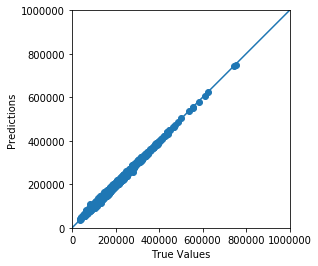

In [28]:
import matplotlib.pyplot as plt

test_predictions = best_reg.predict(X_train_full).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_train_full, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Old Best

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

best_reg = GradientBoostingRegressor(n_estimators=500, max_features= 0.3)
best_reg.fit(X_train_full, Y_train_full)

acc_train_full = np.sqrt(mean_squared_log_error(Y_train_full, best_reg.predict(X_train_full)))

print (f'Best (previous): Train = {acc_train_gb}  Evaluate = {acc_eval_gb}')
print (f'Best FULL Train = {acc_train_full}')

predictions = best_reg.predict(X_test)
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': predictions})
output.to_csv('my_submission.csv', index=False)

Best (previous): Train = 0.03148222511166049  Evaluate = 0.1338114247686076
Best FULL Train = 0.05375110202561062


In [195]:
import xgboost as xgb

best_reg = xgb.XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1.5, n_estimators=1900, 
             n_jobs=1, nthread=None, objective='reg:squarederror',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)
best_reg.fit(X_train_full, Y_train_full)

acc_train_full = np.sqrt(mean_squared_log_error(Y_train_full, best_reg.predict(X_train_full)))

print (f'Best (previous): Train = {acc_train_xg}  Evaluate = {acc_eval_xg}')
print (f'Best FULL Train = {acc_train_full}')

predictions = best_reg.predict(X_test)
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': predictions})
output.to_csv('my_submission.csv', index=False)

Best (previous): Train = 0.02647010979361229  Evaluate = 0.12425329905264909
Best FULL Train = 0.03477245239682382


# Current Test

In [231]:
# 0.03397332264990442
# best_reg = xgb.XGBRegressor( booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.6, gamma=2,
#              importance_type='gain', learning_rate=0.01, max_delta_step=0,
#              max_depth=5, min_child_weight=0, n_estimators=1900, 
#              n_jobs=1, nthread=None, objective='reg:squarederror',
#              reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
#              silent=None, subsample=0.8, verbosity=1)

#0.032199625783860014
# best_reg = xgb.XGBRegressor( booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.7, gamma=2,
#              importance_type='gain', learning_rate=0.01, max_delta_step=0,
#              max_depth=5, min_child_weight=0, n_estimators=1900, 
#              n_jobs=1, nthread=None, objective='reg:squarederror',
#              reg_alpha=0.6, reg_lambda=0.3, scale_pos_weight=1, 
#              silent=None, subsample=0.8, verbosity=1)

# gbm = xgb.XGBRegressor( booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.2, gamma=2,
#              importance_type='gain', learning_rate=0.01, max_delta_step=0,
#              max_depth=5, min_child_weight=0, n_estimators=1900, 
#              n_jobs=1, nthread=None, objective='reg:squarederror',
#              reg_alpha=0.6, reg_lambda=0.3, scale_pos_weight=1, 
#              silent=None, subsample=0.8, verbosity=1, tree_method='approx',
#              sketch_eps=0.06).fit(X_train, Y_train)

best_reg = xgb.XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1.5, n_estimators=1900, 
             n_jobs=1, nthread=None, objective='reg:squarederror',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)
best_reg.fit(X_train_full, Y_train_full)

acc_train_full = np.sqrt(mean_squared_log_error(Y_train_full, best_reg.predict(X_train_full)))

print (f'Best (previous): Train = {acc_train_xg}  Evaluate = {acc_eval_xg}')
print (f'Best FULL Train = {acc_train_full}')

# predictions = best_reg.predict(X_test)
# output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': predictions})
# output.to_csv('my_submission.csv', index=False)

Best (previous): Train = 0.01708599860650016  Evaluate = 0.1337162895583629
Best FULL Train = 0.035655486274897744


## Importance

In [189]:
importances = pd.DataFrame({'feature':X_train_full.columns,'importance':np.round(best_reg.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(30)

,importance
feature,
OverallQual,0.118
TotalSquareFeet,0.088
GarageCars,0.087
NeighborhoodOverallQualNCond,0.065
ExterQual,0.050
NeighborhoodBldgType,0.049
GrLivArea,0.036
NeighborhoodHouseStyle,0.033
KitchenQual,0.033
